<a href="https://colab.research.google.com/github/Anujk-21/Speech_Emotion_Recognition_minor_project/blob/main/minor_project_speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anuj Karoddeo & Team \n

Minor Project \n

GHRIET Nagpur

In [ ]:
pip install librosa==0.9.1 #Librosa is a library that is used for analyzing the behavior of audio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.6 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.1
    Uninstalling librosa-0.10.1:
      Successfully uninstalled librosa-0.10.1


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Root = "/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data"
os.chdir(Root) #used to change the current working directory to specified path

In [ ]:
ls

Actor_01/  Actor_05/  Actor_09/  Actor_13/  Actor_17/  Actor_21/  modelForPrediction1.sav
Actor_02/  Actor_06/  Actor_10/  Actor_14/  Actor_18/  Actor_22/
Actor_03/  Actor_07/  Actor_11/  Actor_15/  Actor_19/  Actor_23/
Actor_04/  Actor_08/  Actor_12/  Actor_16/  Actor_20/  Actor_24/


In [ ]:
import librosa #Python library for audio and music analysis
import soundfile
import os, glob, pickle #the glob module is used to retrieve files
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #multi-layer perceptron (MLP) algorithm that trains using Backpropagation
from sklearn.metrics import accuracy_score



```

Mel-frequency cepstral coefficients (MFCCs) are a feature widely used in automatic speech and speaker recognition,

Chroma feature is a descriptor, which represents the tonal content of a musical audio signal in a condensed form.

melSpectrogram applies a frequency-domain filter bank to audio signals that are windowed in time.

```





[Feature Extraction Info](https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9)

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel): #Mel-frequency cepstral coefficients (MFCCs) are a feature widely used in automatic speech and speaker recognition,chroma feature is a descriptor, which represents the tonal content of a musical audio signal in a condensed form.
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

<ipython-input-7-a02e4183515f>:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-7-a02e4183515f>:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-7-a02e4183515f>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-7-a02e4183515f>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 

In [ ]:
x_train

array([[-5.94010986e+02,  5.55677528e+01,  1.06479979e+01, ...,
         1.12225796e-04,  1.36937582e-04,  6.45097898e-05],
       [-4.42078308e+02,  1.87135830e+01, -1.83509979e+01, ...,
         1.03909126e-03,  6.18079328e-04,  4.08284366e-04],
       [-5.70886841e+02,  3.89964867e+01, -1.10351896e+01, ...,
         9.98173346e-05,  9.29005546e-05,  5.99159139e-05],
       ...,
       [-4.47573944e+02,  1.98053379e+01, -8.72755718e+00, ...,
         2.82809895e-04,  1.67731327e-04,  9.88720640e-05],
       [-5.28273193e+02,  2.99813805e+01, -1.52440462e+01, ...,
         3.64804408e-04,  2.68893549e-04,  2.24908159e-04],
       [-6.02172119e+02,  4.49730186e+01, -7.10431433e+00, ...,
         3.52721981e-05,  2.54294519e-05,  1.54898808e-05]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
y_pred

array(['happy', 'calm', 'disgust', 'calm', 'fearful', 'happy', 'disgust',
       'happy', 'calm', 'fearful', 'happy', 'happy', 'calm', 'happy',
       'calm', 'happy', 'calm', 'calm', 'disgust', 'calm', 'calm',
       'happy', 'happy', 'calm', 'calm', 'calm', 'fearful', 'calm',
       'calm', 'calm', 'happy', 'fearful', 'happy', 'fearful', 'calm',
       'calm', 'calm', 'happy', 'calm', 'calm', 'calm', 'fearful',
       'happy', 'calm', 'fearful', 'calm', 'disgust', 'happy', 'happy',
       'calm', 'happy', 'fearful', 'fearful', 'calm', 'calm', 'happy',
       'fearful', 'happy', 'disgust', 'calm', 'calm', 'calm', 'fearful',
       'happy', 'fearful', 'happy', 'disgust', 'fearful', 'calm', 'calm',
       'happy', 'disgust', 'fearful', 'calm', 'disgust', 'calm',
       'fearful', 'happy', 'calm', 'happy', 'fearful', 'calm', 'happy',
       'calm', 'fearful', 'happy', 'calm', 'happy', 'fearful', 'fearful',
       'calm', 'disgust', 'calm', 'happy', 'fearful', 'fearful', 'calm',
       'c

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 70.31%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
f1_score(y_test, y_pred,average=None)

array([0.83823529, 0.4       , 0.6835443 , 0.73076923])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
0,happy,happy
1,calm,calm
2,happy,disgust
3,fearful,calm
4,fearful,fearful
5,happy,happy
6,happy,disgust
7,happy,happy
8,disgust,calm
9,fearful,fearful


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_2, *['Actual', 'Predicted'], **{})
chart

In [ ]:
df['Actual'].value_counts()

calm       58
happy      49
disgust    46
fearful    39
Name: Actual, dtype: int64

In [ ]:
df['Actual'].value_counts()

calm       58
happy      49
disgust    46
fearful    39
Name: Actual, dtype: int64

<Axes: >

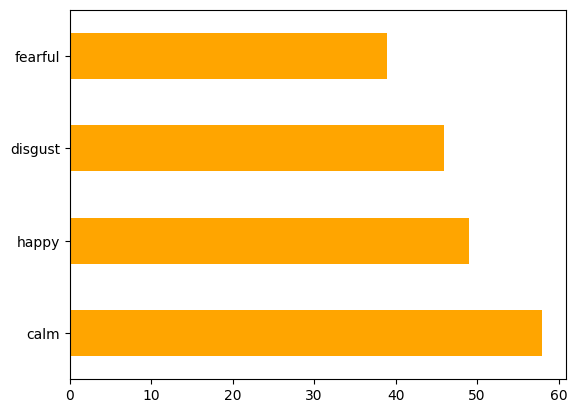

In [ ]:
df['Actual'].value_counts().plot(kind='barh',color='orange')

<Axes: >

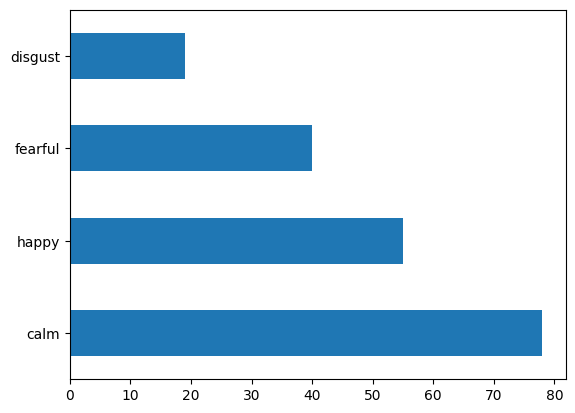

In [ ]:
df['Predicted'].value_counts().plot(kind='barh')

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
feature

array([[-6.34467957e+02,  5.93892822e+01, -6.72700214e+00,
         1.98786736e+01,  5.65597010e+00, -1.97809350e+00,
        -1.20596647e+01, -1.12758331e+01,  7.50101447e-01,
        -3.07209206e+00, -7.29811096e+00,  3.52847409e+00,
        -3.38770938e+00, -9.64613676e-01, -1.63867563e-01,
        -1.01484573e+00, -5.16121101e+00, -2.69878483e+00,
        -1.95542586e+00, -5.16570187e+00, -3.89235544e+00,
        -1.02039075e+00, -2.78581333e+00, -2.34057736e+00,
        -3.24329424e+00, -1.47022113e-01, -2.04253769e+00,
        -1.27173996e+00, -6.20488882e-01, -9.50156510e-01,
        -2.50501657e+00, -1.04651892e+00, -9.73302782e-01,
        -5.34848683e-03, -2.37239861e+00, -2.40924907e+00,
        -2.69261074e+00, -7.45989382e-01, -2.67425865e-01,
        -1.89282966e+00,  7.03663468e-01,  6.45097554e-01,
         6.14764512e-01,  5.66853344e-01,  6.07155502e-01,
         6.60538137e-01,  6.96611404e-01,  7.43477404e-01,
         7.55943358e-01,  7.57876396e-01,  8.08419764e-0

In [ ]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("/content/gdrive/MyDrive/Colab Notebooks/speech-emotion-recognition-data/Actor_09/03-01-03-01-02-02-09.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

<ipython-input-7-a02e4183515f>:16: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


array(['happy'], dtype='<U7')

In [ ]:
def Output():

  if prediction == 'calm':
    print(prediction, " is the emotion that recognised by Model with ",accuracy*100 ,"%")
    print("🙂🙂🙂🙂🙂🙂")
  elif prediction == 'happy':
    print(prediction, " is the emotion that recognised by Model with ",accuracy*100 ,"%")
    print("😁😁😁😁😁😁")
  elif prediction == 'fearful':
    print(prediction, " is the emotion that recognised by Model with ",accuracy*100 ,"%")
    print("😨😨😨😨😨😨")
  else:
    print(prediction, " is the emotion that recognised by Model with ",accuracy*100 ,"%")
    print("😒😒😒😒😒😒")

In [ ]:
Output()

['happy']  is the emotion that recognised by Model with  70.3125 %
😁😁😁😁😁😁


In [ ]:
#print(prediction, " is the emotion that recognised by Model with ",accuracy*100 ,"%")

['happy']  is the emotion that recognised by Model with  70.3125 %
